In [1]:
import sys, os
sys.path.insert(1, os.getcwd() + '\..\src')
sys.path.insert(1, os.getcwd() + '/../src')

In [2]:
from session_generator import *
import pandas as pd
import seaborn as sns

In [5]:
# List with number of sessions for different days ([number of sessions on day 1, ..., number of sessions on the last day])
daily_sessions = [10]*10

input_gen = InputGen(daily_sessions=daily_sessions, data_file='data/Sessions2.csv', rnd_seeds=(4,5,30))
# Remove outliers:
input_gen.data = input_gen.data[(input_gen.data['DurationHrs'] < 15) & (input_gen.data['DurationHrs'] > 1/6)]
input_gen.data = input_gen.data[input_gen.data['cumEnergy_Wh'] / input_gen.data['DurationHrs'] <= 6700]

input_gen.arrival_gen()
input_gen.duration_gen()
input_gen.energy_gen()

input_df = input_gen.df

#input_df['arrivalMin'] = input_df['arrivalMin'].apply(lambda x: round(x/30)*30 + 30)
#input_df['arrivalMinGlobal'] = input_df['arrivalMinGlobal'].apply(lambda x: round(x/30)*30 + 30)
input_df['durationMin'] = input_df['durationMin'].apply(lambda x: round(x/30)*30 + 90)
input_df['cumEnergy_Wh'] = input_df['cumEnergy_Wh'].apply(lambda x: round(x/10)*10 + 10)

input_df.head(10)

,arrivalDay,arrivalMin,arrivalMinGlobal,durationMin,cumEnergy_Wh
0,0,364,364,180,20
1,0,467,467,630,40
2,0,480,480,270,30
3,0,535,535,630,20
4,0,576,576,450,50
5,0,631,631,510,30
6,0,642,642,570,60
7,0,977,977,300,20
8,0,1016,1016,210,20
9,0,1045,1045,180,10


In [6]:
input_df['cumEnergy_Wh'].value_counts()

20    33
10    26
30    13
40    11
50     8
70     5
60     4
Name: cumEnergy_Wh, dtype: int64

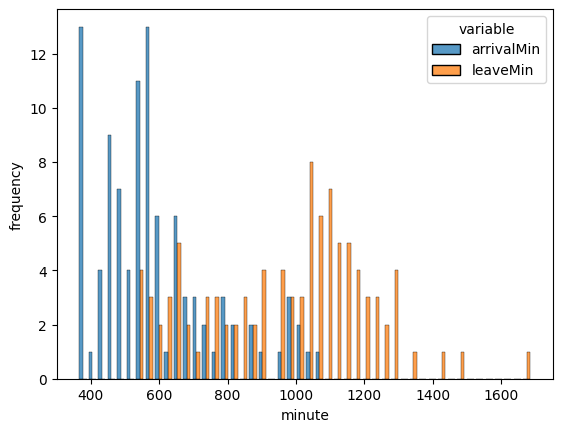

In [10]:
input_df_hist = pd.DataFrame(input_df['arrivalMin'])
input_df_hist['leaveMin']=input_df['arrivalMin'] + input_df['durationMin']

# plot melted dataframe in a single command
p=sns.histplot(input_df_hist.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=48)

p.set_xlabel("minute", fontsize = 10)
p.set_ylabel("frequency", fontsize = 10);

In [11]:
input_df_hist.head()

,arrivalMin,leaveMin
0,364,544
1,467,1097
2,480,750
3,535,1165
4,576,1026


In [12]:
input_df['arrivalMinGlobal'][0]

364